Dataset Shape: (569, 30)

Feature Names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names: ['malignant' 'benign']

Class Distribution:
 1    357
0    212
Name: count, dtype: int64

Model Performance Metrics:
-------------------------
Accuracy: 0.9736842105263158

Classification Report:

              precision    recall  f1-score   support

   malignant       0.98      0.95      0.96        43
      benign       0.97      0.99      0.98        71

    accuracy               

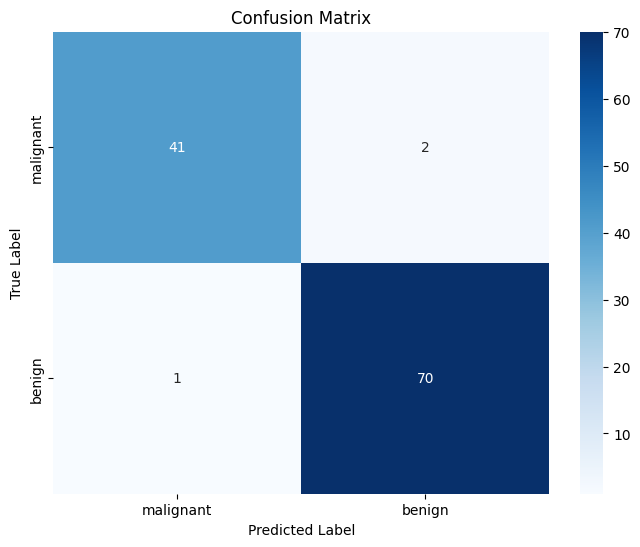

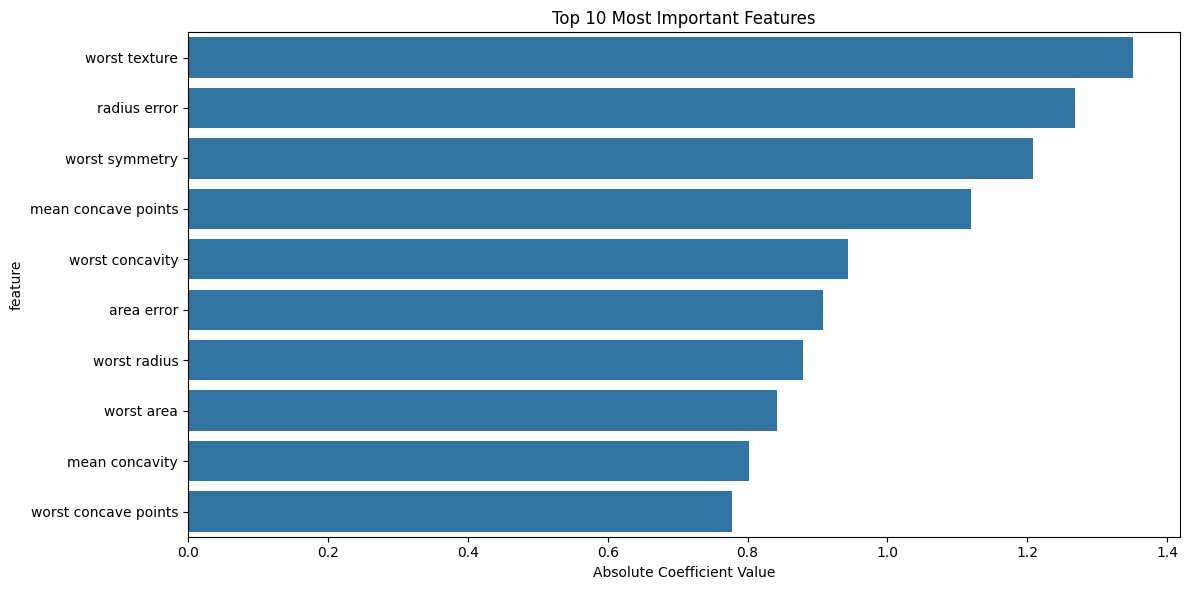

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the breast cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Print basic information about the dataset
print("Dataset Shape:", X.shape)
print("\nFeature Names:\n", data.feature_names)
print("\nTarget Names:", data.target_names)
print("\nClass Distribution:\n", pd.Series(y).value_counts())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train the logistic regression model
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Print model performance metrics
print("\nModel Performance Metrics:")
print("-------------------------")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

# Create confusion matrix visualization
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Feature importance visualization
feature_importance = pd.DataFrame({
    'feature': data.feature_names,
    'importance': abs(model.coef_[0])
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Most Important Features')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

# Save the model (optional)
import joblib
joblib.dump(model, 'breast_cancer_model.joblib')
joblib.dump(scaler, 'scaler.joblib')

# Example of how to use the saved model for predictions
def predict_new_data(new_data, model, scaler):
    """
    Make predictions on new data using the saved model

    Parameters:
    new_data (array-like): Data to make predictions on
    model: Loaded model
    scaler: Loaded scaler

    Returns:
    array: Predictions (0 for malignant, 1 for benign)
    """
    # Scale the new data
    new_data_scaled = scaler.transform(new_data)
    # Make predictions
    return model.predict(new_data_scaled)

# Example usage:
# new_patient = X.iloc[0:1]  # Just using first row as example
# prediction = predict_new_data(new_patient, model, scaler)
# print("Prediction:", data.target_names[prediction[0]])